In [0]:
import pandas as pd
import numpy as np

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New Section

In [0]:
data = pd.read_csv('drive/My Drive/ml_project/Dataset/uber-raw-data-apr14.csv')
data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [0]:

data.isna().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [0]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'], format="%m/%d/%Y %H:%M:%S")
data['DayOfWeekNum'] = data['Date/Time'].dt.dayofweek
data['DayOfWeek'] = data['Date/Time'].dt.day_name()
data['MonthDayNum'] = data['Date/Time'].dt.day
data['HourOfDay'] = data['Date/Time'].dt.hour
data['MinOfDay'] = data['Date/Time'].dt.minute
data.head()

,Date/Time,Lat,Lon,Base,DayOfWeekNum,DayOfWeek,MonthDayNum,HourOfDay,MinOfDay
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,Tuesday,1,0,11
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,Tuesday,1,0,17
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,Tuesday,1,0,21
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,Tuesday,1,0,28
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,Tuesday,1,0,33


In [0]:
weekday = data.pivot_table(index=['DayOfWeek'],
                                  values='Base',
                                  aggfunc='count')
weekday.head(10)

,Base
DayOfWeek,
Friday,90303
Monday,60861
Saturday,77218
Sunday,51251
Thursday,85067
Tuesday,91185
Wednesday,108631


In [0]:
weekdayAverage= weekday/30
weekdayAverage.head()


,Base
DayOfWeek,
Friday,3010.100000
Monday,2028.700000
Saturday,2573.933333
Sunday,1708.366667
Thursday,2835.566667


Text(0.5, 1.0, 'Average Rides per Day vs Day of Week')

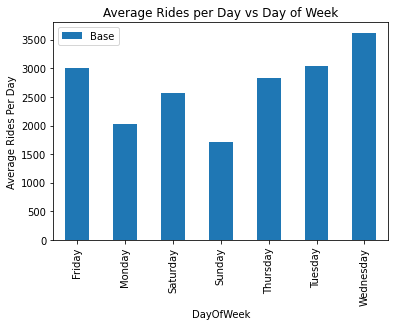

In [0]:
import matplotlib.pyplot as plt
weekdayAverage.plot(kind='bar')
plt.ylabel('Average Rides Per Day')
plt.title('Average Rides per Day vs Day of Week')

In [0]:
df = pd.DataFrame(data)
df

,Date/Time,Lat,Lon,Base,DayOfWeekNum,DayOfWeek,MonthDayNum,HourOfDay,MinOfDay
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,Tuesday,1,0,11
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,Tuesday,1,0,17
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,Tuesday,1,0,21
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,Tuesday,1,0,28
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,Tuesday,1,0,33
...,...,...,...,...,...,...,...,...,...
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,2,Wednesday,30,23,22
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,2,Wednesday,30,23,26
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,2,Wednesday,30,23,31
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,2,Wednesday,30,23,32


Text(0.5, 1.0, 'Number of Rides vs Hour of Day')

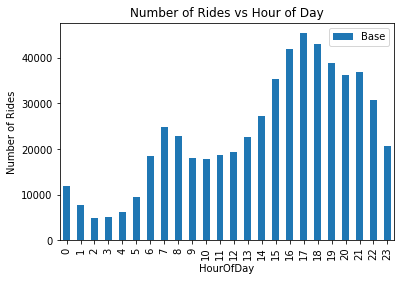

In [27]:
Hours = data.pivot_table(index=['HourOfDay'],
                                  values='Base',
                                  aggfunc='count')

Hours.plot(kind='bar')
plt.ylabel('Number of Rides')
plt.title('Number of Rides vs Hour of Day')

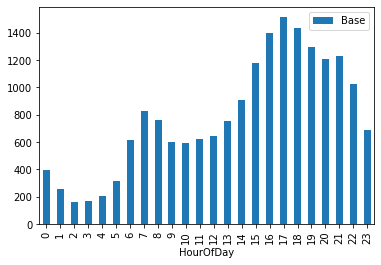

In [28]:
avgHours = Hours/30
avgHours.plot(kind='bar')

Text(0.5, 1.0, 'Number of Rides vs dayOfMonth')

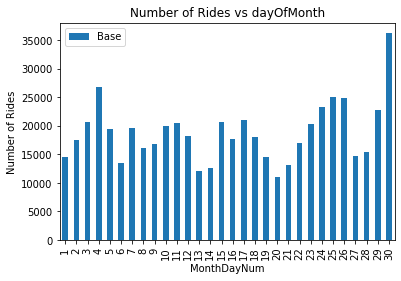

In [32]:
dayOfMonth = data.pivot_table(index=['MonthDayNum'],
                                  values='Base',
                                  aggfunc='count')

dayOfMonth.plot(kind='bar')
plt.ylabel('Number of Rides')
plt.title('Number of Rides vs dayOfMonth')